<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-2/blob/main/Assignment_7_1_Classifications_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 7.1 : Classifications and Regression.ipynb** |
**Members:** | Clarito, Vincent Maverick
**Section** | CPE32S9
**Date Performed**: | 04/13/2024
**Date Submitted**: | 04/13/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

Instructions:

Choose any dataset applicable to the classification problem, and also, choose any dataset applicable to the regression problem.

Explain your datasets and the problem being addressed.

1.   For classification, do the following:
  * Create a base model
  * Evaluate the model with k-fold cross validation
  * Improve the accuracy of your model by applying additional hidden layers

2.   For regression, do the following:
  * Create a base model
  * Improve the model by standardizing the dataset
  * Show tuning of layers and neurons (see evaluating small and larger networks)

Submit the link to your Google Colab (make sure that it is accessible to me)




Here is all the libraries & dependencies I used for this activity:

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Classification**

In [ ]:
white = pd.read_csv("/content/drive/My Drive/Datasets/winequality-white.csv", sep=';')
red = pd.read_csv("/content/drive/My Drive/Datasets/winequality-red.csv", sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
pd.isnull(white).count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

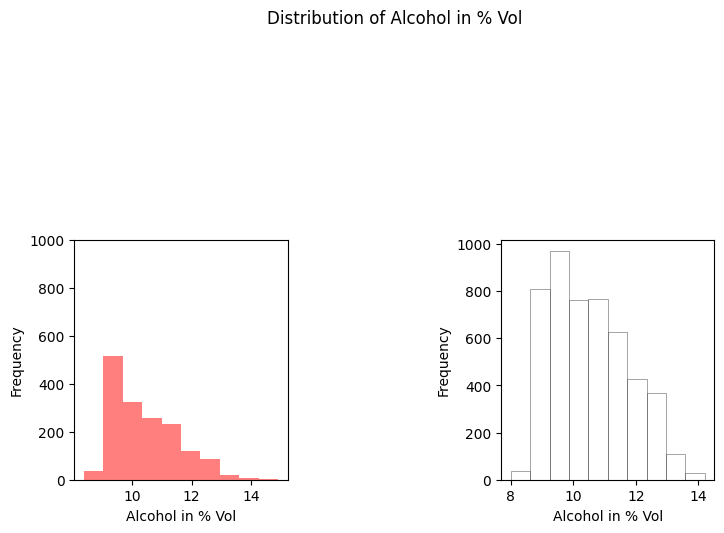

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [ ]:
red['type'] = 1
white['type'] = 0

# Concatenate red and white DataFrames using pd.concat
wines = pd.concat([red, white], ignore_index=True)
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [ ]:
X=wines.iloc[:,0:11]
y= np.ravel(wines.type)
#y= wines.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
wine_history = model.fit(X_train, y_train,epochs=20, validation_data=(X_test_norm, y_test))

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3435 - loss: 0.7983 - val_accuracy: 0.7431 - val_loss: 0.5518
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7596 - loss: 0.5079 - val_accuracy: 0.7426 - val_loss: 0.4352
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7603 - loss: 0.4048 - val_accuracy: 0.8662 - val_loss: 0.3407
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9130 - loss: 0.3009 - val_accuracy: 0.9836 - val_loss: 0.2422
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9897 - loss: 0.2123 - val_accuracy: 0.9862 - val_loss: 0.1734
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9918 - loss: 0.1516 - val_accuracy: 0.9867 - val_loss: 0.1319
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9934 - loss: 0.1127 - val_accuracy: 0.9877 - val_loss: 0.1059
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9938 - loss: 0.0854 - val_accuracy: 

Test Accuracy: 0.990
Test Accuracy: 0.996


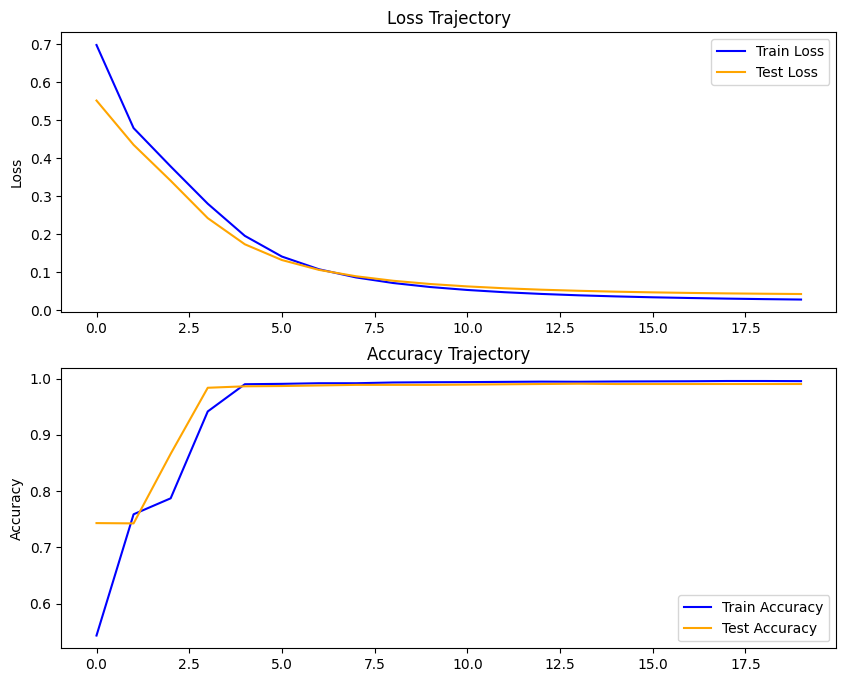

In [ ]:
#This is where I plot the accuracy of both my training and test objects
train_loss = wine_history.history['loss']
test_loss = wine_history.history['val_loss']
train_accuracy = wine_history.history['accuracy']
test_accuracy = wine_history.history['val_accuracy']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Test Accuracy: %.3f' % acc)

# **2. Regression**

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

def get_data():
    train_data_path = '/content/drive/My Drive/Datasets/train.csv'
    train = pd.read_csv(train_data_path)

    test_data_path = '/content/drive/My Drive/Datasets/test.csv'
    test = pd.read_csv(test_data_path)

    return train, test

def get_combined_data():
    train, test = get_data()
    if 'occupation' in train.columns:
        target = train['educational-num']
        train.drop(['educational-num'], axis=1, inplace=True)
    else:
        raise ValueError("Column 'occupation' not found in train dataset!")

    combined = pd.concat([train, test], ignore_index=True)
    combined.reset_index(drop=True, inplace=True)

    return combined, target

train_data, test_data = get_data()
combined, target = get_combined_data()

print("Combined Data:")
print(combined.head())


Combined Data:
   age  workclass  fnlwgt     education      marital-status        occupation  \
0   67    Private  366425     Doctorate            Divorced   Exec-managerial   
1   17    Private  244602          12th       Never-married     Other-service   
2   31    Private  174201     Bachelors  Married-civ-spouse   Exec-managerial   
3   58  State-gov  110199       7th-8th  Married-civ-spouse  Transport-moving   
4   25  State-gov  149248  Some-college       Never-married     Other-service   

    relationship   race gender  capital-gain  capital-loss  hours-per-week  \
0  Not-in-family  White   Male         99999             0              60   
1      Own-child  White   Male             0             0              15   
2        Husband  White   Male             0             0              40   
3        Husband  White   Male             0             0              40   
4  Not-in-family  Black   Male             0             0              40   

  native-country  income_>50K

In [ ]:
combined.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income_>50K,educational-num
count,44856.000000,4.485600e+04,44856.000000,44856.000000,44856.000000,43957.000000,899.000000
mean,38.616328,1.897627e+05,1086.251583,88.721152,40.421995,0.239279,10.185762
std,13.721436,1.058047e+05,7519.761299,405.401776,12.400502,0.426648,2.477511
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,1.175288e+05,0.000000,0.000000,40.000000,0.000000,9.000000
50%,37.000000,1.782110e+05,0.000000,0.000000,40.000000,0.000000,10.000000
75%,48.000000,2.377540e+05,0.000000,0.000000,45.000000,0.000000,13.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000,1.000000,16.000000


In [ ]:
#This makes sure that I don't have missing values on the columns of my dataset.
def get_cols_with_no_nans(df,col_type):
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [ ]:
#This gets columns that doesn't have missing values.
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [ ]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 5
Number of nun-numerical columns with no nan values : 5


Comment:
I only got 5 columns that doesn't have any missing values.

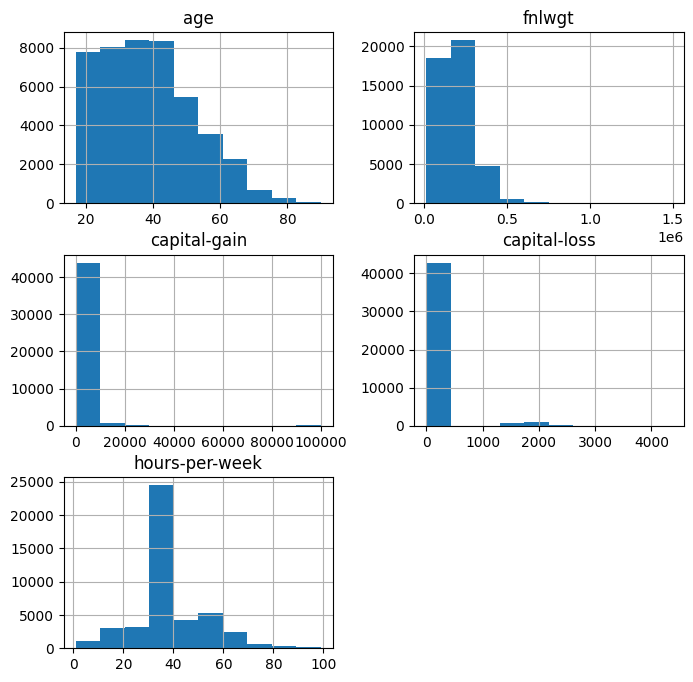

In [ ]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (8,8))
plt.show()

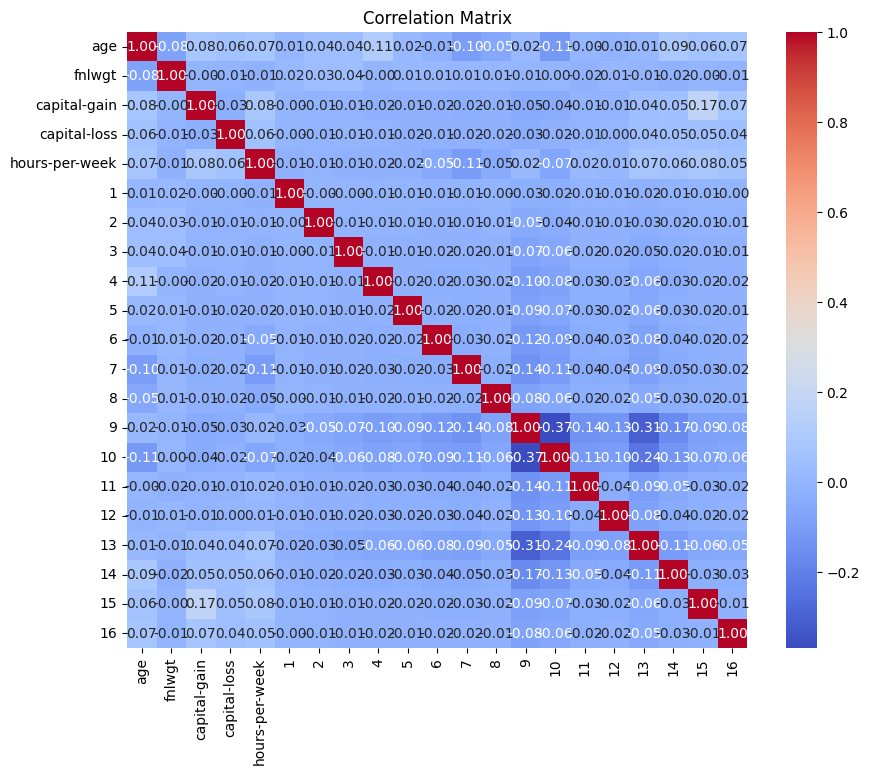

In [ ]:
#This shows the correlation between the combined and chosen features.
numeric_train_data = train_data[num_cols]
encoded_occupation = pd.get_dummies(target)
numeric_train_data = pd.concat([numeric_train_data, encoded_occupation], axis=1)

C_mat = numeric_train_data.corr()

fig = plt.figure(figsize=(10, 8))
sns.heatmap(C_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [ ]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 10 columns before encoding categorical features
There are 41 columns after encoding categorical features


In [ ]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test

In [ ]:
train, test = split_combined()

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(10, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
NN_model.add(Dense(5, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(5, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(5, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
NN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
NN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=Weights-{epoch:03d}--{val_loss:.5f}.hdf5

In [ ]:
import numpy as np

# Convert target to a suitable data type
target = target.astype(np.float32)  # Ensure target is of float32 type

# Now you can train your neural network
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split=0.2, callbacks=callbacks_list)